## Dimensionalidad: 
Se refiere al número de características o variables en un conjunto de datos. Los conjuntos de datos con muchas dimensiones pueden ser difíciles de manejar y analizar.

## Reducción de Dimensionalidad:
Es el proceso de transformar un conjunto de datos de alta dimensionalidad en uno con menos dimensiones, preservando la mayor cantidad de información posible. Los dos métodos más comunes son:

## Análisis de Componentes Principales (PCA):
Un método estadístico que proyecta los datos en un espacio de dimensiones más bajo.

## Selección de Características:

Implica seleccionar un subconjunto de características más relevantes.

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(42)
data = {
    'feature_1': np.random.rand(10),
    'feature_2': np.random.rand(10),
    'feature_3': np.random.rand(10),
    'feature_4': np.random.rand(10),
    'feature_5': np.random.rand(10),
}

df = pd.DataFrame(data)

display(df)

,feature_1,feature_2,feature_3,feature_4,feature_5
0,0.374540,0.020584,0.611853,0.607545,0.122038
1,0.950714,0.969910,0.139494,0.170524,0.495177
2,0.731994,0.832443,0.292145,0.065052,0.034389
3,0.598658,0.212339,0.366362,0.948886,0.909320
4,0.156019,0.181825,0.456070,0.965632,0.258780
5,0.155995,0.183405,0.785176,0.808397,0.662522
6,0.058084,0.304242,0.199674,0.304614,0.311711
7,0.866176,0.524756,0.514234,0.097672,0.520068
8,0.601115,0.431945,0.592415,0.684233,0.546710
9,0.708073,0.291229,0.046450,0.440152,0.184854


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
display(df_pca)

,PC1,PC2
0,1.248333,-1.192094
1,-2.704439,1.014203
2,-2.371229,-0.804675
3,1.284276,1.741340
4,1.695832,-0.938603
5,2.377583,0.610852
6,0.100715,-1.339486
7,-1.146386,0.926520
8,0.567221,0.867118
9,-1.051906,-0.885175


In [5]:
print(f"Varianza explicada por componente: {pca.explained_variance_ratio_}")


Varianza explicada por componente: [0.54851505 0.23143335]


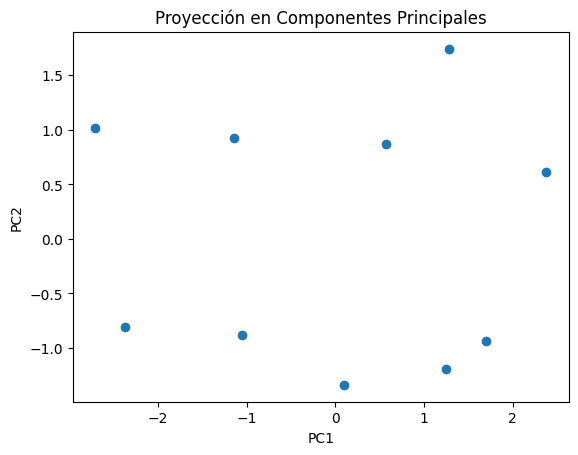

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.title("Proyección en Componentes Principales")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [7]:
print(df.corr())

           feature_1  feature_2  feature_3  feature_4  feature_5
feature_1   1.000000   0.704285  -0.372964  -0.555227   0.069729
feature_2   0.704285   1.000000  -0.450620  -0.736808  -0.092807
feature_3  -0.372964  -0.450620   1.000000   0.464012   0.294302
feature_4  -0.555227  -0.736808   0.464012   1.000000   0.419207
feature_5   0.069729  -0.092807   0.294302   0.419207   1.000000


In [8]:
umbral_correlacion = 0.7
correlacion_abs = df.corr().abs()
eliminar_caracteristicas = set()
for i in range(len(correlacion_abs.columns)):
    for j in range(i):
        if correlacion_abs.iloc[i, j] > umbral_correlacion:
            colname = correlacion_abs.columns[i]
            eliminar_caracteristicas.add(colname)

print(f"Características a eliminar por alta correlación: {eliminar_caracteristicas}")

df_reducido = df.drop(columns=eliminar_caracteristicas)
display(df_reducido)

Características a eliminar por alta correlación: {'feature_4', 'feature_2'}


,feature_1,feature_3,feature_5
0,0.374540,0.611853,0.122038
1,0.950714,0.139494,0.495177
2,0.731994,0.292145,0.034389
3,0.598658,0.366362,0.909320
4,0.156019,0.456070,0.258780
5,0.155995,0.785176,0.662522
6,0.058084,0.199674,0.311711
7,0.866176,0.514234,0.520068
8,0.601115,0.592415,0.546710
9,0.708073,0.046450,0.184854
